In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [55]:
df_train = pd.read_csv('wine_train.csv')
df_test = pd.read_csv('wine_test.csv')
df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,6.8,0.18,0.28,8.50,0.047,52.0,242.0,0.99520,3.22,0.53,10.5,white,6
1,7.8,0.20,0.20,1.40,0.036,25.0,83.0,0.99088,3.03,0.46,11.7,white,6
2,5.8,0.24,0.28,1.40,0.038,40.0,76.0,0.98711,3.10,0.29,13.9,white,7
3,6.8,0.18,0.30,12.80,0.062,19.0,171.0,0.99808,3.00,0.52,9.0,white,7
4,6.7,0.31,0.42,6.40,0.057,25.0,148.0,0.99550,3.16,0.45,9.6,white,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,6.9,0.28,0.40,8.20,0.036,15.0,95.0,0.99440,3.17,0.33,10.2,white,5
4543,6.0,0.38,0.26,3.50,0.035,38.0,111.0,0.98872,3.18,0.47,13.6,white,7
4544,7.5,0.30,0.21,6.55,0.026,33.0,143.0,0.99244,2.92,0.35,11.1,white,5
4545,5.9,0.21,0.23,7.90,0.033,22.0,130.0,0.99440,3.38,0.59,10.9,white,6


In [56]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547 entries, 0 to 4546
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4547 non-null   float64
 1   volatile acidity      4547 non-null   float64
 2   citric acid           4547 non-null   float64
 3   residual sugar        4547 non-null   float64
 4   chlorides             4547 non-null   float64
 5   free sulfur dioxide   4547 non-null   float64
 6   total sulfur dioxide  4547 non-null   float64
 7   density               4547 non-null   float64
 8   pH                    4547 non-null   float64
 9   sulphates             4547 non-null   float64
 10  alcohol               4547 non-null   float64
 11  type                  4547 non-null   object 
 12  quality               4547 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 461.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 ent

In [57]:
df_test.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
quality                 0
dtype: int64

In [58]:
df_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000
mean,7.224709,0.338717,0.320658,5.408247,0.055603,30.422916,115.718276,0.994682,3.217277,0.531172,10.493832,5.817022
std,1.280764,0.163757,0.145906,4.786129,0.034542,17.747184,56.565059,0.003027,0.160377,0.149151,1.193236,0.879918
min,4.200000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.720000,0.230000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.250000,0.992300,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,2.900000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.000000,0.065000,41.000000,155.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [59]:
df_train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
quality                 0
dtype: int64

In [60]:
df_train['type'].nunique()

2

In [61]:
df_train['type'].value_counts()

type
white    3432
red      1115
Name: count, dtype: int64

In [62]:
#sns.heatmap(df_train.corr())

In [63]:
#Splitting the features and target variable
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:, -1]

#Splitting the features and target variable
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:, -1]

X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,6.8,0.18,0.28,8.50,0.047,52.0,242.0,0.99520,3.22,0.53,10.5,white
1,7.8,0.20,0.20,1.40,0.036,25.0,83.0,0.99088,3.03,0.46,11.7,white
2,5.8,0.24,0.28,1.40,0.038,40.0,76.0,0.98711,3.10,0.29,13.9,white
3,6.8,0.18,0.30,12.80,0.062,19.0,171.0,0.99808,3.00,0.52,9.0,white
4,6.7,0.31,0.42,6.40,0.057,25.0,148.0,0.99550,3.16,0.45,9.6,white
...,...,...,...,...,...,...,...,...,...,...,...,...
4542,6.9,0.28,0.40,8.20,0.036,15.0,95.0,0.99440,3.17,0.33,10.2,white
4543,6.0,0.38,0.26,3.50,0.035,38.0,111.0,0.98872,3.18,0.47,13.6,white
4544,7.5,0.30,0.21,6.55,0.026,33.0,143.0,0.99244,2.92,0.35,11.1,white
4545,5.9,0.21,0.23,7.90,0.033,22.0,130.0,0.99440,3.38,0.59,10.9,white


In [64]:
from sklearn.preprocessing import LabelEncoder


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data in the 'response' column
X_train['type'] = label_encoder.fit_transform(X_train['type'])
X_test['type'] = label_encoder.fit_transform(X_test['type'])
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,6.8,0.18,0.28,8.50,0.047,52.0,242.0,0.99520,3.22,0.53,10.5,1
1,7.8,0.20,0.20,1.40,0.036,25.0,83.0,0.99088,3.03,0.46,11.7,1
2,5.8,0.24,0.28,1.40,0.038,40.0,76.0,0.98711,3.10,0.29,13.9,1
3,6.8,0.18,0.30,12.80,0.062,19.0,171.0,0.99808,3.00,0.52,9.0,1
4,6.7,0.31,0.42,6.40,0.057,25.0,148.0,0.99550,3.16,0.45,9.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4542,6.9,0.28,0.40,8.20,0.036,15.0,95.0,0.99440,3.17,0.33,10.2,1
4543,6.0,0.38,0.26,3.50,0.035,38.0,111.0,0.98872,3.18,0.47,13.6,1
4544,7.5,0.30,0.21,6.55,0.026,33.0,143.0,0.99244,2.92,0.35,11.1,1
4545,5.9,0.21,0.23,7.90,0.033,22.0,130.0,0.99440,3.38,0.59,10.9,1


In [65]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [82]:
y_pred = reg.predict(X_test)
if isinstance(y_test, pd.Series):
    y_test = y_test.values
np.set_printoptions(precision=1)
result = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1)
pd.DataFrame(result, columns=['Predicted', 'Actual'])

,Predicted,Actual
0,5.307380,6.0
1,6.812268,7.0
2,5.950249,7.0
3,5.684589,6.0
4,5.954933,4.0
...,...,...
1945,6.433463,6.0
1946,5.653296,5.0
1947,6.200684,5.0
1948,5.944396,6.0


In [85]:
from sklearn.metrics import r2_score
r2_model = r2_score(y_test, y_pred)
r2_model

0.3061361959087713

In [92]:
ridge = Ridge()
ridge_search = GridSearchCV(estimator=ridge, param_grid={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]},
                     scoring='neg_mean_squared_error', n_jobs=1, refit=True, cv=10)

In [93]:
ridge_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=1,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [103]:
y_pred_ridge = ridge_search.predict(X_test)
if isinstance(y_test, pd.Series):
    y_test = y_test.values
np.set_printoptions(precision=1)
ridge_result = np.concatenate((y_pred_ridge.reshape(len(y_pred_ridge), 1), y_test.reshape(len(y_test), 1)), axis=1)
predictions_ridge = pd.DataFrame(ridge_result, columns=['Predicted', 'Actual'])

predictions_ridge.to_csv('predictions_ridge.csv', index=False)

#Print the prediction
print(predictions_ridge)

      Predicted  Actual
0      5.330739     6.0
1      6.809609     7.0
2      5.867935     7.0
3      5.676145     6.0
4      5.975510     4.0
...         ...     ...
1945   6.424501     6.0
1946   5.647967     5.0
1947   6.193703     5.0
1948   5.906377     6.0
1949   5.429026     5.0

[1950 rows x 2 columns]


In [95]:
from sklearn.metrics import r2_score
r2_ridge_model = r2_score(y_test, y_pred_ridge)
r2_ridge_model

0.3045453443510404

In [98]:
from sklearn.ensemble import RandomForestRegressor

# Create the RandomForestRegressor model with the preprocessing pipeline
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

rf_result = np.concatenate((y_pred_rf.reshape(len(y_pred_rf), 1), y_test.reshape(len(y_test), 1)), axis=1)

predictions_rf = pd.DataFrame(rf_result, columns=['Predicted', 'Actual'])

# Optional: Save the predictions to a CSV file

predictions_rf.to_csv('predictions_rf.csv', index=False)

#Print the prediction
print(predictions_rf)

Random Forest - Mean Squared Error: 0.3739610256410257
Random Forest - R-squared: 0.49143849138227014


In [102]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the GradientBoostingRegressor model with the preprocessing pipeline
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)


# Fit the model
gb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting - R-squared: {r2_gb}")

gb_result = np.concatenate((y_pred_gb.reshape(len(y_pred_gb), 1), y_test.reshape(len(y_test), 1)), axis=1)

predictions_gb = pd.DataFrame(gb_result, columns=['Predicted', 'Actual'])

# Optional: Save the predictions to a CSV file

predictions_gb.to_csv('predictions_gb.csv', index=False)

#Print the prediction
print(predictions_gb)

Gradient Boosting - Mean Squared Error: 0.4507349092540382
Gradient Boosting - R-squared: 0.387031241975068
      Predicted  Actual
0      5.268671     6.0
1      6.694879     7.0
2      5.754789     7.0
3      5.376356     6.0
4      5.799939     4.0
...         ...     ...
1945   6.655902     6.0
1946   5.370711     5.0
1947   6.408471     5.0
1948   6.388916     6.0
1949   5.627520     5.0

[1950 rows x 2 columns]


In [96]:
import pickle
with open('trained_model-0.1.0.pk1','wb') as f:pickle.dump(reg,f)

In [86]:
# Baseline model: Predict the mean of the training target values
mean_train_target = y_train.mean()
y_baseline_pred = np.full_like(y_test, mean_train_target)

# Calculate R² score for the baseline model
baseline_r2 = r2_score(y_test, y_baseline_pred)
print(f'Baseline R²: {baseline_r2}')

# Compare the R² scores
if r2_model > baseline_r2:
    print("The model performs better than the baseline.")
else:
    print("The model does not perform better than the baseline.")

Baseline R²: -0.9178526059191099
The model performs better than the baseline.


In [75]:
# Summary statistics
print(y_train.describe())


count    4547.000000
mean        5.817022
std         0.879918
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


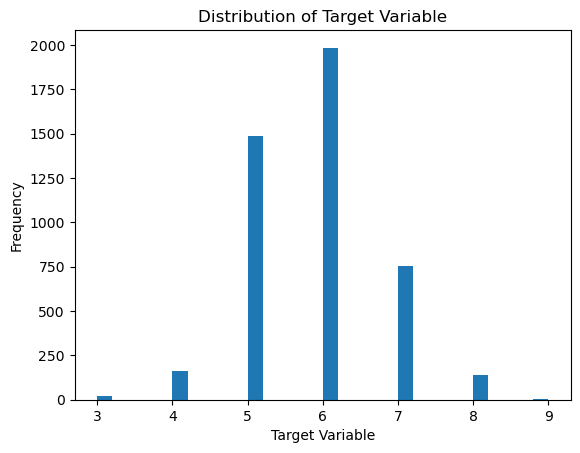

In [76]:
# Histogram
plt.hist(y_train, bins=30)
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

In [77]:
# Range
target_range = y_train.max() - y_train.min()
print(f'Target Range: {target_range}')

Target Range: 6


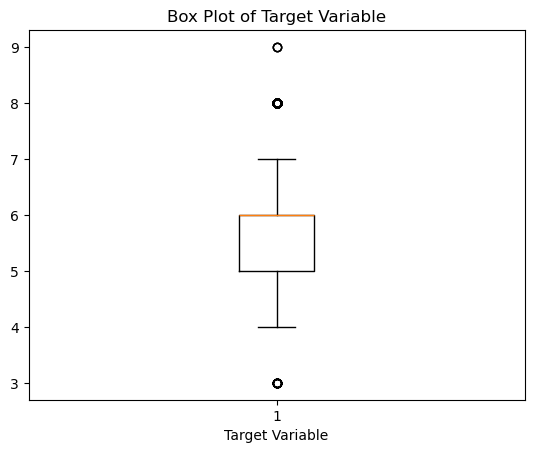

In [78]:
# Box Plot
plt.boxplot(y_train)
plt.xlabel('Target Variable')
plt.title('Box Plot of Target Variable')
plt.show()

In [87]:
import sys
print(sys.version)

3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
